In [12]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join('..')))

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


from scripts.preprocessing import Preprocess
from scripts.plots import Plot

In [14]:
##Making imports from causalnex module

from causalnex.discretiser.discretiser_strategy import DecisionTreeSupervisedDiscretiserMethod
# from causalnex.utils.network_utils import get_markov_blanket
from causalnex.evaluation import classification_report 
from causalnex.structure.notears import from_pandas
from causalnex.plots import NODE_STYLE, EDGE_STYLE
from causalnex.network import BayesianNetwork
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE
from IPython.display import Image



#### Split data into training and hold-out set

In [15]:
# Read Clean Data

clean_data = pd.read_csv("../data/clean_data.csv")
clean_data.head(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,18.84,86.24,551.1,0.09587,0.09263,0.06154,0.03350,0.1792,...,14.97,25.41,97.66,686.5,0.1313,0.2119,0.2267,0.09993,0.2822,0.08004
1,M,20.57,17.77,86.24,551.1,0.09587,0.07864,0.08690,0.07017,0.1812,...,14.97,23.41,97.66,686.5,0.1238,0.1866,0.2416,0.09993,0.2750,0.08902
2,M,19.69,21.25,86.24,551.1,0.09587,0.09263,0.06154,0.03350,0.1792,...,14.97,25.53,97.66,686.5,0.1444,0.2119,0.2267,0.09993,0.2822,0.08758


In [16]:
#### Scale and select features only

features_df = clean_data.drop(['diagnosis'], axis=1)
process = Preprocess()
X = process.scaler(features_df)
X[:5]


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.521037,0.474245,0.382648,0.360927,0.501849,0.423183,0.316195,0.245670,0.511834,0.456057,...,0.33910,0.501157,0.328167,0.301037,0.500000,0.337155,0.418033,0.362807,0.471111,0.416101
1,0.643144,0.284192,0.382648,0.360927,0.501849,0.209530,0.566937,0.928665,0.571006,0.456057,...,0.33910,0.269676,0.328167,0.301037,0.244898,0.205315,0.473547,0.362807,0.364444,0.851600
2,0.601496,0.902309,0.382648,0.360927,0.501849,0.423183,0.316195,0.245670,0.511834,0.271971,...,0.33910,0.515046,0.328167,0.301037,0.945578,0.337155,0.418033,0.362807,0.471111,0.781765
3,0.210090,0.747780,0.083305,0.360927,0.501849,0.423183,0.316195,0.245670,0.511834,0.456057,...,0.32872,0.627315,0.357472,0.092140,0.500000,0.337155,0.418033,0.362807,0.471111,0.416101
4,0.629893,0.474245,0.382648,0.360927,0.735869,0.423183,0.316195,0.245670,0.562130,0.134204,...,0.33910,0.501157,0.328167,0.301037,0.707483,0.301199,0.418033,0.362807,0.471111,0.258002


In [17]:
# Selecting target variable
target = clean_data.diagnosis
Y = target.map(lambda x: 1 if x == "M" else  0)
Y[:5]

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

In [18]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


#### Get training data

In [23]:
### Concatenate the train_x and train_y

total_train = pd.concat([x_train, y_train], axis=1)
new = total_train[10:-1]

#### Create a causal graph using all training data and get the insights

- The number of variables for our dataset is quite large and may be tedious to define the structure of this dataset manually. We therefore employ the capability of CausalNex to learn the structure model from the data.
- We will use the NOTEAR algorithm 


In [25]:
%%time

sm = from_pandas(new, tabu_parent_nodes=['diagnosis'],)

UsageError: Line magic function `%%time` not found.


/home/wacira/anaconda3/envs/causality/lib/python3.7/site-packages/pygraphviz/agraph.py:1390: RuntimeWarning: Warning: node 'radius_mean', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


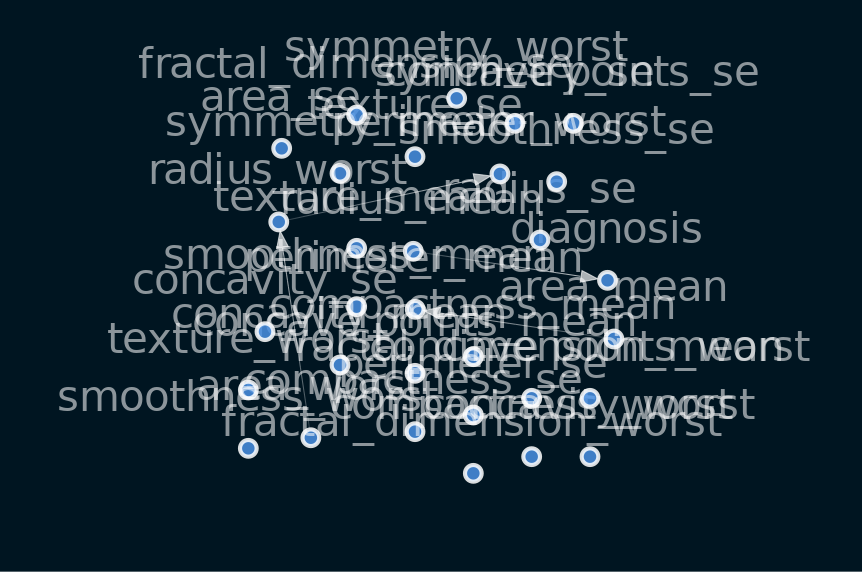

In [21]:
sm.remove_edges_below_threshold(0.8)

viz = plot_structure(
    sm,
    graph_attributes={"scale": "0.5"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK,
    prog='fdp',
)
Image(viz.draw(format='png'))

In [22]:
plot = Plot(b)

NameError: name 'b' is not defined

In [ ]:
sm.remove_edges_below_threshold(0.8)

/home/wacira/anaconda3/envs/causality/lib/python3.7/site-packages/pygraphviz/agraph.py:1390: RuntimeWarning: Warning: node 'radius_mean', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


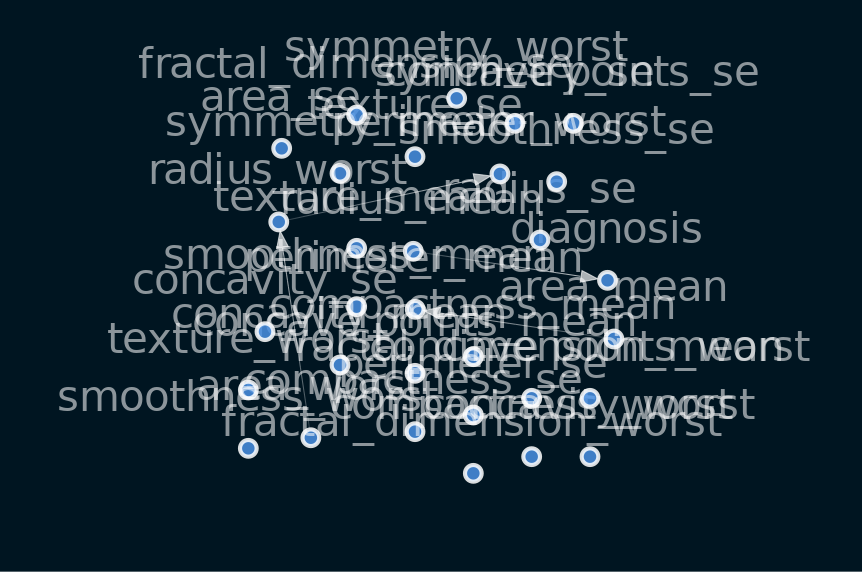

In [ ]:
plot.vis_sm(sm)